# COMP4030 - Data Science and Machine Learning - Lab 2
# Wrangling and preprocessing data

*Authors*: Johann Benerradi, Jeremie Clos

**Points from last lab you absolutely need to be familiar with**:

- read a CSV file: `pd.read_csv()`
- write into a CSV file: `df.to_csv()`


- select one column: `df['column']`
- select multiple columns: `df[['column1', 'column2']]`


- select based on index: `df.iloc[i_row, i_col]`


- select based on condition: `df.loc[condition]`
- select based on condition and column name: `df.loc[condition, 'column']`
- select based on condition and column names: `df.loc[condition, ['column1', 'column2']]`


- create new column: `df['new_column'] = column_values`
- reassign column values based on condition: `df.loc[condition, 'column'] = new_value`
- delete rows or columns: `df.drop()`


- combine rows: `pd.concat()`
- combine columns: `pd.merge()`


- sort rows: `df.sort_values()`


- get table shape: `df.shape`
- get summary stats: `df.describe()`

In [1]:
import numpy as np
import pandas as pd

## 1. Penguin dataset

Let's first work on a dataset gathering informations about penguins. The original dataset can be found [here](https://allisonhorst.github.io/palmerpenguins/), but in this lab we will work on a modified version of it that can be found on Moodle (`penguins_modified.csv`). You will have to download it and then load it as a *DataFrame*:

In [2]:
df_penguins = pd.read_csv('penguins_modified.csv', index_col=0)

### 1.1 Exploring the dataset to find potential issues

It is usually good to print the Dataframe and it's summary stats just to have a general idea about it:

In [3]:
print(df_penguins.shape)
df_penguins

(345, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,0.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,0.0,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


In [4]:
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,341.000000,343.000000,345.000000
mean,43.920700,17.137243,200.970845,4475.362319
std,5.451644,1.965180,14.078903,3824.030630
min,32.100000,13.100000,172.000000,0.000000
25%,39.250000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.500000,4775.000000
max,59.600000,21.200000,231.000000,52500.000000


Describe can also be used on *Series* object that are not numerical such as the *species* categorical column:

In [5]:
df_penguins['species'].describe()

count        345
unique         3
top       Adelie
freq         152
Name: species, dtype: object

We can also print the unique values for a categorical column:

In [6]:
df_penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

With this initial exploration we can notice a couple of things:
- there is a mismatch between the number of rows and the ID &rarr; **1.2 Dealing with duplicates**
- the minimum and maximum are very different than the 25th and 75th percentiles &rarr; **1.3 Dealing with outliers and bad data**
- there is a mismatch between the number of rows and the counts of each column &rarr; **1.4 Dealing with missing data**

> **Note**: Finding and solving data issue require some investigation skills. In most cases you will have to use common sense and your expertise in a specific domain of application (eg. impossibility for some values to exceed boundaries, impossibility of combinations between different values, ...) in order to spot incoherences and fix them in the most appropriate way.
>
>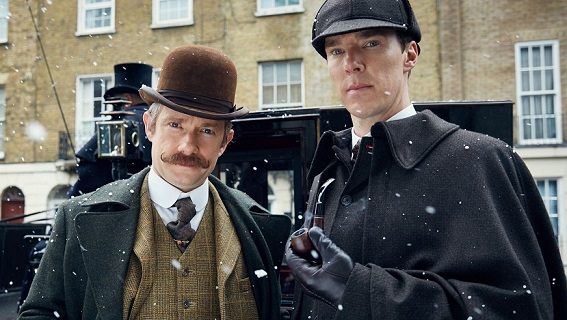

### 1.2 Dealing with duplicates

There is a very handy Pandas method that enables to print all the rows that are identical. **It is a useful method to use, even though there is no mismatch between the number of rows and the indices, because indices can potentially be corrupted.** The method outputs the rows that have duplicate values (by default on all the columns except the index column, but the behaviour can be changed to find duplicates only on a subset of columns):

In [7]:
df_penguins[df_penguins.duplicated(keep=False)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,Female
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,Female


Note in that case how with an integer `loc` and `iloc` behave differently. `loc` will select based on the number in the "index name" column which may output multiple rows if they have the same number, while `iloc` will always select base on the actual row index.

In [8]:
df_penguins.loc[288, :]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,Female
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,Female


**Task 1.2.1**: Print the selection of dataset rows with `iloc` for row *288*, and notice the difference with the output above. Then, print the selection of the dataset rows with `loc` and `iloc` for row *289*.

In [9]:
print(df_penguins.iloc[288, :])
print(df_penguins.loc[289, :])
print(df_penguins.iloc[289, :])

species              Gentoo
island               Biscoe
bill_length_mm         43.5
bill_depth_mm          14.2
flipper_length_mm     220.0
body_mass_g          4700.0
sex                  Female
Name: 288, dtype: object
species              Gentoo
island               Biscoe
bill_length_mm         50.7
bill_depth_mm          15.0
flipper_length_mm     223.0
body_mass_g          5550.0
sex                    Male
Name: 289, dtype: object
species              Gentoo
island               Biscoe
bill_length_mm         43.5
bill_depth_mm          14.2
flipper_length_mm     220.0
body_mass_g          4700.0
sex                  Female
Name: 288, dtype: object


Anyway, in this case it seems likely that we do have at least one duplicate since 2 rows have the same ID, let's delete one of them (if the 2 IDs hadn't been the same it may have been safer to keep them both, this would be on a case to case basis depending on what seems the most coherent):

In [10]:
df_penguins = df_penguins.drop_duplicates()
print(df_penguins.shape)
df_penguins

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,0.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,0.0,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


### 1.3 Dealing with outliers and bad data

It seems that the issue is mainly in the body mass column, first let's print all the rows for which the body mass is less than the 5th percentile:

In [11]:
df_penguins[df_penguins['body_mass_g'] < df_penguins['body_mass_g'].quantile(0.05)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
3,Adelie,Torgersen,NaN,NaN,NaN,0.0,Male
44,Adelie,Dream,37.0,16.9,185.0,3000.0,Female
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
54,Adelie,Biscoe,34.5,18.1,187.0,0.0,Female
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,Female
110,Adelie,Biscoe,38.1,16.5,198.0,0.0,Female


We can suspect that *0* has been written as body mass whenever there was a missing value, indeed it doesn't make sense that a penguin has a body mass of 0. Let's replace those values by *NaN*:

In [12]:
print(df_penguins['body_mass_g'].min())
df_penguins.loc[df_penguins['body_mass_g'] == 0, 'body_mass_g'] = np.nan
print(df_penguins['body_mass_g'].min())

0.0
2700.0


**Task 1.3.1**: Print all the rows for which the body mass is greater than the 95th percentile. Store this subset *DataFrame* in a `df_penguins_95_plus` variable.

In [14]:
df_penguins_95_plus

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
108,Adelie,Biscoe,38.1,17.0,181.0,31750.0,Female
133,Adelie,Dream,37.5,18.5,199.0,44750.0,Male
233,Gentoo,Biscoe,48.4,NaN,213.0,5850.0,Male
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,Male
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
250,Gentoo,Biscoe,47.3,15.3,222.0,52500.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
287,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,Male
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,Male


Here we can see that 3 values are around 10 times the others, this doesn't seem normal. Let's have a look at the actual CSV files for indices 108, 133 and 250...

**Task 1.3.2**: Open the CSV file with the text editor of your choice and inspect those lines.

You may notice that all the rows have floating-point numbers except those three. We can suspect that the dot has eventually been removed. This is the kind of issues that is hard to notice in Pandas because of the automatic interpretation of value types, hence the usefulness of actually having a look at the suspicious data in its original format.

With outliers it is often hard to tell what actually happened, it may be safer to keep those rows if values do not seem too out of place or actually delete them if they are obviously out of place but we cannot guess what happened.

Here let's say our first assumption is correct and let's divide by 10 all the values of body mass that are greater than 9999 g:

In [15]:
print(df_penguins['body_mass_g'].max())
df_penguins.loc[df_penguins['body_mass_g'] > 9999, 'body_mass_g'] = df_penguins['body_mass_g'] / 10
print(df_penguins['body_mass_g'].max())

52500.0
6300.0


### 1.4 Dealing with missing data

Let's print all the rows with missing values:

In [16]:
print(df_penguins[df_penguins.isna().any(axis=1)].shape)
df_penguins[df_penguins.isna().any(axis=1)]

(17, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
19,Adelie,Torgersen,46.0,NaN,194.0,4200.0,Male
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
54,Adelie,Biscoe,34.5,18.1,187.0,NaN,Female
110,Adelie,Biscoe,38.1,16.5,198.0,NaN,Female


#### Deletion

In some situations, the best way to deal with missing data can be to just drop the whole row. Here, some rows have missing data for all the measurement columns, let's just drop them:

In [17]:
df_penguins = df_penguins.dropna(thresh=4).copy()  # drop rows that have less than 4 non-NaN
df_penguins[df_penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
19,Adelie,Torgersen,46.0,NaN,194.0,4200.0,Male
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
54,Adelie,Biscoe,34.5,18.1,187.0,NaN,Female
110,Adelie,Biscoe,38.1,16.5,198.0,NaN,Female
117,Adelie,Torgersen,37.3,20.5,199.0,NaN,Male


> **Note**: The `dropna()` function (like some other filtering functions) requires a `copy()` in order to avoid inconsistant behaviours and throwing *SettingWithCopyWarning* on later operations.

#### Imputation: body mass

In [18]:
df_penguins[df_penguins['body_mass_g'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
54,Adelie,Biscoe,34.5,18.1,187.0,NaN,Female
110,Adelie,Biscoe,38.1,16.5,198.0,NaN,Female
117,Adelie,Torgersen,37.3,20.5,199.0,NaN,Male
176,Chinstrap,Dream,46.7,17.9,195.0,NaN,Female


We can also deal with missing data with imputation. One way to do it could be to replace them by values of the subgroup they belong to. For example, for rows that are just missing the body mass, we can replace the missing values by the average of their subgroup.

**Task 1.4.1**: Replace the *NaN* values of body mass above by the average body mass of the subgroup to which each row belongs (average body mass of penguins of the same species, same island and same sex). Ideally write a script to automate it instead of doing it by manually selecting each row manually.

In [20]:
df_penguins.loc[[54, 110, 117, 176]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
54,Adelie,Biscoe,34.5,18.1,187.0,3370.000000,Female
110,Adelie,Biscoe,38.1,16.5,198.0,3370.000000,Female
117,Adelie,Torgersen,37.3,20.5,199.0,4046.590909,Male
176,Chinstrap,Dream,46.7,17.9,195.0,3534.090909,Female


Keep in mind that replacing missing values by the mean can bias the data by reducing artificially the standard deviation. Also in some cases it may be more relevant to use the median instead of the mean for example when the values need to be integers.

#### Imputation: bill depth

In [21]:
df_penguins[df_penguins['bill_depth_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
ID,,,,,,,
19,Adelie,Torgersen,46.0,NaN,194.0,4200.0,Male
233,Gentoo,Biscoe,48.4,NaN,213.0,5850.0,Male


We can also do imputation by using knowledge of the domain of application. For example, assuming that in the literature there is clear evidence that for penguins the bill length is proportional to the bill depth, we could guess missing bill depth values using this relation.

**Task 1.4.2**: Calculate the average ratio of bill depth over bill length and use this value to replace the missing bill depth values in our table.

In [23]:
df_penguins.loc[[19, 233]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio
ID,,,,,,,,
19,Adelie,Torgersen,46.0,18.318951,194.0,4200.0,Male,NaN
233,Gentoo,Biscoe,48.4,19.274722,213.0,5850.0,Male,NaN


#### Doing nothing

In [24]:
df_penguins[df_penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio
ID,,,,,,,,
8,Adelie,Torgersen,34.1,18.100000,193.0,3475.0,NaN,0.530792
9,Adelie,Torgersen,42.0,20.200000,190.0,4250.0,NaN,0.480952
10,Adelie,Torgersen,37.8,17.100000,186.0,3300.0,NaN,0.452381
11,Adelie,Torgersen,37.8,17.300000,180.0,3700.0,NaN,0.457672
19,Adelie,Torgersen,46.0,18.318951,194.0,4200.0,Male,NaN
47,Adelie,Dream,37.5,18.900000,179.0,2975.0,NaN,0.504000
233,Gentoo,Biscoe,48.4,19.274722,213.0,5850.0,Male,NaN
246,Gentoo,Biscoe,44.5,14.300000,216.0,4100.0,NaN,0.321348
286,Gentoo,Biscoe,46.2,14.400000,214.0,4650.0,NaN,0.311688


Finally in some cases the best choice may be to just let some missing values, if they do not interfere with the kind of analysis we are planning to do.

#### Saving the dataset after cleanup

After doing all this cleanup work on the dataset, saving it is usually a smart thing to do:

In [25]:
df_penguins.to_csv('penguins_modified_CLEAN.csv')

### 1.5 Normalisation

It can be useful to normalise data, for example to understand better where a point is situated within a distribution.

#### Min-max normalisation

$$
\frac{X - X_{min}}{X_{max}-X_{min}}
$$

Let's min-max normalise the flipper length:

In [26]:
df_penguins['flipper_length_mm'] = (
    (df_penguins['flipper_length_mm']-df_penguins['flipper_length_mm'].min()) /
    (df_penguins['flipper_length_mm'].max()-df_penguins['flipper_length_mm'].min()))
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio
ID,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,0.152542,3750.0,Male,0.478261
1,Adelie,Torgersen,39.5,17.4,0.237288,3800.0,Female,0.440506
2,Adelie,Torgersen,40.3,18.0,0.389831,3250.0,Female,0.446650
4,Adelie,Torgersen,36.7,19.3,0.355932,3450.0,Female,0.525886
5,Adelie,Torgersen,39.3,20.6,0.305085,3650.0,Male,0.524173
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,0.711864,4925.0,Female,0.290254
340,Gentoo,Biscoe,46.8,14.3,0.728814,4850.0,Female,0.305556
341,Gentoo,Biscoe,50.4,15.7,0.847458,5750.0,Male,0.311508


#### Standard score

$$
\frac{X - \mu}{\sigma}
$$

Let's standardise the body mass:

In [27]:
df_penguins['body_mass_g'] = (
    (df_penguins['body_mass_g']-df_penguins['body_mass_g'].mean()) /
    df_penguins['body_mass_g'].std())
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio
ID,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,0.152542,-0.566481,Male,0.478261
1,Adelie,Torgersen,39.5,17.4,0.237288,-0.503994,Female,0.440506
2,Adelie,Torgersen,40.3,18.0,0.389831,-1.191354,Female,0.446650
4,Adelie,Torgersen,36.7,19.3,0.355932,-0.941405,Female,0.525886
5,Adelie,Torgersen,39.3,20.6,0.305085,-0.691456,Male,0.524173
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,0.711864,0.901971,Female,0.290254
340,Gentoo,Biscoe,46.8,14.3,0.728814,0.808240,Female,0.305556
341,Gentoo,Biscoe,50.4,15.7,0.847458,1.933012,Male,0.311508


---

## 2. Analyse ourselves dataset

In this section you will be tasked to work on the dataset collected during this module (`DMA 2023 - Let's Analyse Ourselves(1-206).xlsx`), it can be found on Moodle. You will find below tasks that will guide you for the analysis of this dataset.

In [28]:
df = pd.read_excel("DMA 2023 - Let's Analyse Ourselves(1-206).xlsx", index_col=0)
df

,Start time,Completion time,Email,Name,I love,Age Band,Do you love Marmite,Main reason for taking DMA,I am optimistic about the future of the world,My favourite movie of all time is,Today I am feeling:,My favourite way to relax after a stressful day is:,"On average, how many hours of sleep do you get on a weekday night?",How many sweets do you think there are in this tin?
ID,,,,,,,,,,,,,,
1,2023-01-31 13:05:06,2023-01-31 13:05:52,anonymous,NaN,Dogs,18 to 24,Yes,Increase knowledge of subject area,Strongly Agree,The Shawshank Redemption,Excited,Gym workout,8.0,7.0
2,2023-01-31 16:12:13,2023-01-31 16:14:24,anonymous,NaN,Cats,18 to 24,No,Increase knowledge of subject area,Strongly Agree,The Shawshank Redemption,Tired,Gaming,8.0,35.0
3,2023-01-31 16:29:12,2023-01-31 16:30:16,anonymous,NaN,Both,18 to 24,Don't know what it is,Just curious,Agree,Pulp Fiction,Tired,Bath and Bed,24.0,1.0
4,2023-01-31 17:18:53,2023-01-31 17:20:40,anonymous,NaN,Both,18 to 24,Don't know what it is,Increase knowledge of subject area,Agree,None of the above,Sad,Bath and Bed,7.0,3.0
5,2023-01-31 17:39:18,2023-01-31 17:40:34,anonymous,NaN,Both,18 to 24,No,Increase knowledge of subject area,Agree,None of the above,Excited,Gaming,7.5,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023-02-03 15:55:08,2023-02-03 15:56:30,anonymous,NaN,Cats,18 to 24,Don't know what it is,Relevant to my research,Neutral,Enter the Dragon,Tired,Gaming,7.0,10.0
203,2023-02-03 18:22:25,2023-02-03 18:23:26,anonymous,NaN,Dogs,18 to 24,Never tried it,Just curious,Strongly Agree,Star Wars (1977),Excited,Reading a book,7.0,50.0
204,2023-02-05 19:06:06,2023-02-05 19:08:23,anonymous,NaN,Cats,25 to 30,Don't know what it is,Increase knowledge of subject area,Strongly Agree,The Shawshank Redemption,Tired,Bath and Bed,7.0,6.0


> **Note about time series and dates**: You can notice that two columns consist of time / date type of values. In our case they are automatically detected by the reading function, however you can convert data into time series / date with the `pd.to_datetime()` function. This is very important that they are recognised as such because otherwise, operations on them will not make sense. Once they are properly recognised, operations such as addition and subtractions on those time / date values will take their data type into account.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 1 to 206
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Start time                                                          206 non-null    datetime64[ns]
 1   Completion time                                                     206 non-null    datetime64[ns]
 2   Email                                                               206 non-null    object        
 3   Name                                                                0 non-null      float64       
 4   I love                                                              206 non-null    object        
 5   Age Band                                                            206 non-null    object        
 6   Do you love Marmite                                       

**Task 2.1**: Using the start and completion times, create a new column that contains the completion duration of the form.

**Task 2.2**: Some columns in this dataset are not very useful since our dataset is anonymous (email and name), delete them from the table.

**Task 2.3**: For convenience later on, use the [`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) method to rename the long column names.

**Task 2.4**: Explore the dataset by printing informations about each column using the `describe()` method. For categorical columns, also print all the unique values.

**Task 2.5**: Use the techniques seen before to identify and eventually correct duplicates, if any.

**Task 2.6**: Use the techniques seen before to identify and eventually correct outliers, if any. For this purpose **think of what are realistic values for each column** (including the new completion duration column you created). Depending on the extent of incoherence of values, take a decision on a case to case basis of either:
- replacing the value by another value
- replacing the values by *Nan*
- dropping the whole row

**Task 2.7**: Use the techniques seen before to identify and eventually correct appropriately missing data, if any.

**Task 2.8**: Create a new column with the standardised sleep time (standard score).

---

## 3. Final tasks

**Final task 1**: Create your own simple research question about this dataset. Research questions could include:
- Are cat lovers more optimistic about the future?
- Were people with less sleep more tired the day of answering the questionnaire?
- ...

**Final task 2**: Answer your research question using the techniques seen in this lab and the previous one.

---

## 4. Open tasks

**Open task 1**: Load the dataset with questionnaire's answers of last year (`DMA 2022 - Lets Analyse Ourselves(1-140).xlsx`).

**Open task 2**: Compare the results of this year (`DMA 2023 - Let's Analyse Ourselves(1-206).xlsx`) to those of last year (`DMA 2022 - Lets Analyse Ourselves(1-140).xlsx`).